In [6]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import Sequential
import numpy as np

In [7]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [8]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "images",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names

In [84]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(class_names)

3

In [11]:
len(dataset)

68

In [12]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

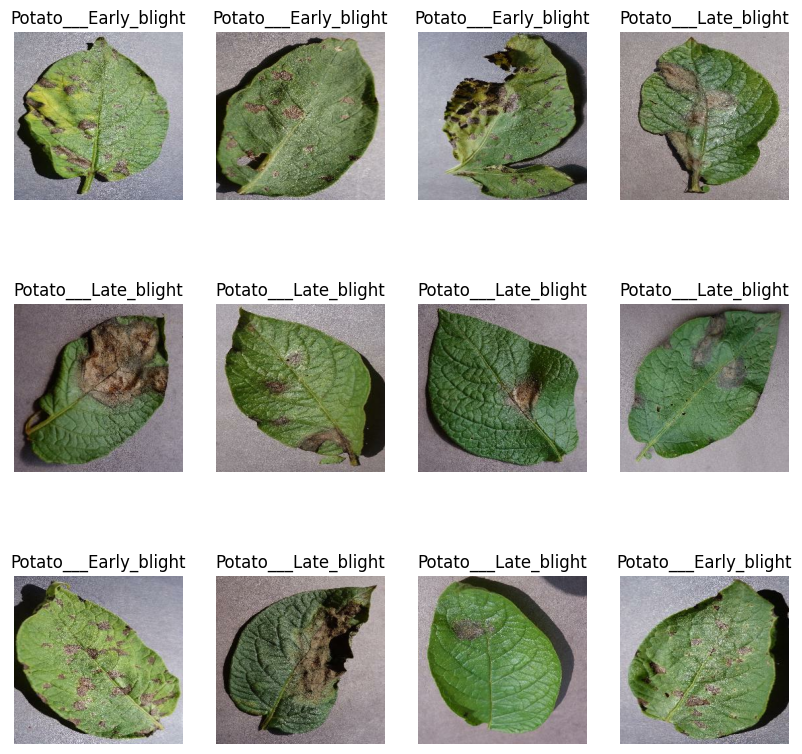

In [13]:
plt.figure(figsize=(10,10))
for image_batch,label in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [14]:
#Training_size=80%
#Test_size=20%
print(80*68/100)

54.4


In [15]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,shuffle=True):
    
    ds_size=len(ds)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [17]:
len(train_ds),len(test_ds),len(val_ds)

(54, 8, 6)

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
data_augumentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [21]:
model=tf.keras.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
    
])
model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [24]:
history=model.fit(
        train_ds,
        epochs=10,
        batch_size=BATCH_SIZE,
        validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 96s 2s/step - loss: 0.7787 - accuracy: 0.6308 - val_loss: 0.6111 - val_accuracy: 0.8021
Epoch 2/10
54/54 [==============================] - 94s 2s/step - loss: 0.3519 - accuracy: 0.8640 - val_loss: 0.2599 - val_accuracy: 0.8698
Epoch 3/10
54/54 [==============================] - 91s 2s/step - loss: 0.1969 - accuracy: 0.9236 - val_loss: 0.2875 - val_accuracy: 0.9062
Epoch 4/10
54/54 [==============================] - 87s 2s/step - loss: 0.1517 - accuracy: 0.9358 - val_loss: 0.1925 - val_accuracy: 0.9167
Epoch 5/10
54/54 [==============================] - 87s 2s/step - loss: 0.1415 - accuracy: 0.9456 - val_loss: 0.3234 - val_accuracy: 0.8906
Epoch 6/10
54/54 [==============================] - 87s 2s/step - loss: 0.1243 - accuracy: 0.9468 - val_loss: 0.1973 - val_accuracy: 0.9115
Epoch 7/10
54/54 [==============================] - 90s 2s/step - loss: 0.1357 - accuracy: 0.9468 - val_loss: 0.3567 - val_accuracy: 0.8646
Epoch 8/10
54/54 [==

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history["loss"]

[0.778677225112915,
 0.35191747546195984,
 0.19687992334365845,
 0.15172158181667328,
 0.1415054351091385,
 0.12426039576530457,
 0.1357221007347107,
 0.1219666376709938,
 0.10840956121683121,
 0.15178602933883667]

In [30]:
history.history["accuracy"]

[0.6307870149612427,
 0.8640046119689941,
 0.9236111044883728,
 0.9357638955116272,
 0.9456018805503845,
 0.9467592835426331,
 0.9467592835426331,
 0.9542824029922485,
 0.9618055820465088,
 0.9473379850387573]

In [31]:
score=model.evaluate(test_ds)

8/8 [==============================] - 4s 358ms/step - loss: 0.1424 - accuracy: 0.9440


In [32]:
score

[0.142351895570755, 0.943965494632721]

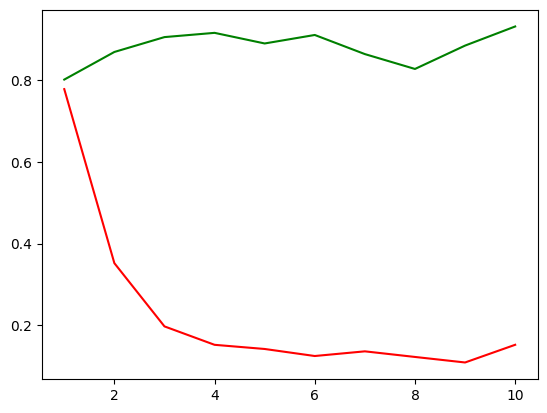

In [35]:
losses=history.history["loss"]
accuracy=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot([i for i in range(1,11)],losses,color="red")
plt.plot([i for i in range(1,11)],val_acc,color="green")

Actual Label :  Potato___Late_blight
1/1 [==============================] - 1s 664ms/step
Model prediction :  Potato___Late_blight


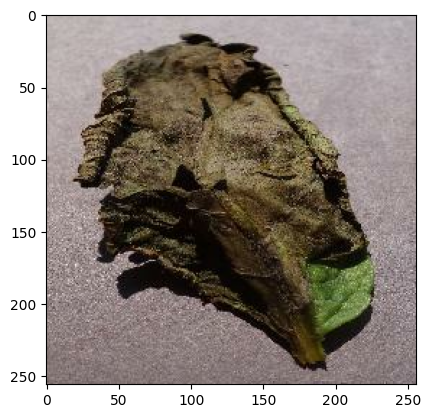

In [36]:
for image_batch,label in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("Actual Label : ",class_names[label.numpy()[0]])
    batch_prediction=model.predict(image_batch)
    print("Model prediction : ",class_names[np.argmax(batch_prediction[0])])

In [65]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence =  round(100*np.max(prediction[0]),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 77ms/step


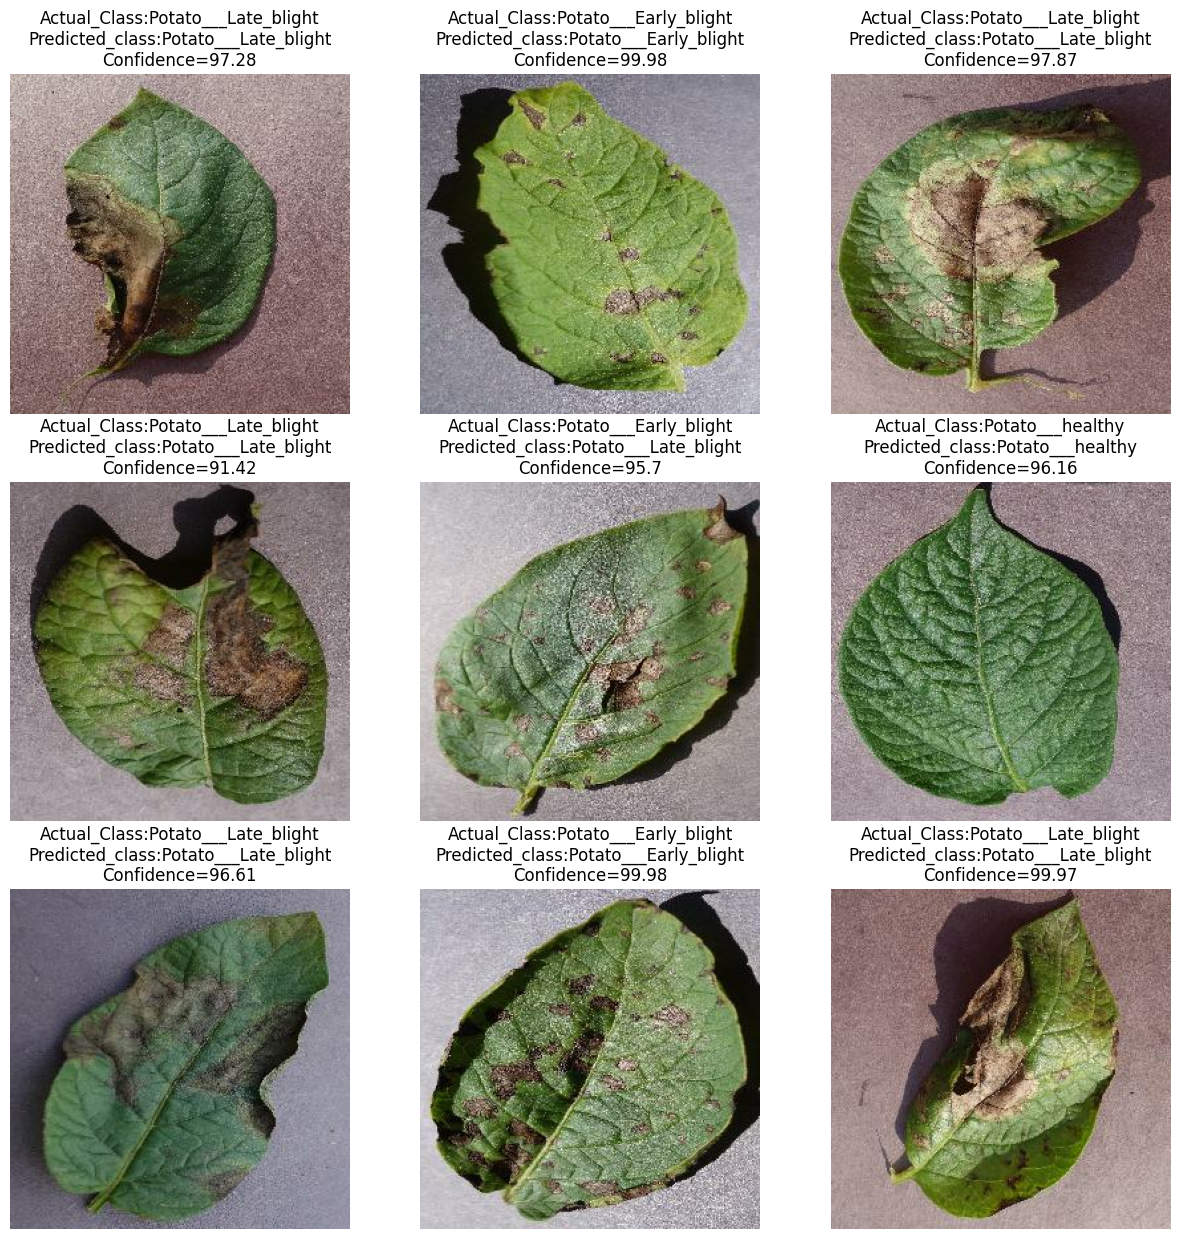

In [66]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        predicted_class,confidence=predict(model,images[i])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Actual_Class:{0}\nPredicted_class:{1}\nConfidence={2}".format(class_names[labels[i]],predicted_class,confidence))
        plt.axis("off")


In [83]:
model_version=1
model.save(f"C:\\Users\\jaswa\\conda\\envs\\project\\models\\{model_version}")

INFO:tensorflow:Assets written to: C:\Users\jaswa\conda\envs\project\models\1\assets


INFO:tensorflow:Assets written to: C:\Users\jaswa\conda\envs\project\models\1\assets
